<font size="6"><b>Regression</b></font>

Table of Contents
<div id="toc"></div>

The goal is to make quantitative (real valued) predictions on the basis of a (vector of) features or attributes

# 1. Linear Regression

Begin by considering linear regression (easy to extend to more comlex predictions later on)

$\text{Given} \; \begin{cases}
x_{i} \; \text{: inputs} \\
y_{i} \; \text{: outputs}
\end{cases}$
, Find $\theta_{1}$ and $\theta_{2}$


$$x=
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{m}
\end{bmatrix}, \qquad
y=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{m}
\end{bmatrix} \approx
\hat{y}_{i} = \theta_{1}x_{i} + \theta_{2} $$

- $ \hat{y}_{i} $ : predicted output 

- $ \theta = 
\begin{bmatrix}
\theta_{1} \\
\theta_{2} \\
\end{bmatrix}
$ : Model parameters

$$ \hat{y}_{i} = f(x_{i}, \theta) \; \text{ in general}$$

- in many cases, a linear model to predict $y_{i}$ used


$$ \hat{y}_{i} = \theta_{1}x_{i} + \theta_{2} \; \text{  such that  } \min\limits_{\theta_{1}, \theta_{2}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2$$

<br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr>
        <td width = 400 style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/linear_regression02.jpg", width = 300>
        </td>       
        <td width = 400>
            <img src="./image_files/linear_regression.png", width = 300>

        </td>
    </tr>
</table>

## 1.1. Re-cast problem as a least squares

- For convenience, we define a function that maps inputs to feature vectors, $\phi$

$$\begin{array}{Icr}\begin{align*} \hat{y}_{i}
& = \begin{bmatrix}x_{i} & 1\end{bmatrix}\begin{bmatrix}\theta_{1} \\ \theta_{2}\end{bmatrix} \\
& =\begin{bmatrix}x_{i} \\1\end{bmatrix}^{T}\begin{bmatrix}\theta_{1} \\ \theta_{2}\end{bmatrix} \\
& =\phi^{T}(x_{i})\theta
\end{align*}\end{array}
\begin{array}{Icr}
\quad \quad \text{feature vector}
\; \phi(x_{i}) = \begin{bmatrix}x_{i} \\1\end{bmatrix}
\end{array}$$

<br>

$$\Phi = \begin{bmatrix}x_{1} & 1 \\x_{2} & 1 \\ \vdots \\x_{m} & 1 \end{bmatrix}=\begin{bmatrix}\phi(x_{1})^T \\\phi(x_{2})^T \\\vdots \\\phi(x_{m})^T \end{bmatrix} \quad \implies \quad \hat{y} = \begin{bmatrix}\hat{y}_{1} \\\hat{y}_{2} \\\vdots \\\hat{y}_{m}\end{bmatrix}=\Phi\theta$$

<br>
- optimization problem

$$\min\limits_{\theta_{1}, \theta_{2}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2
=\min\limits_{\theta}\lVert\Phi\theta-y\rVert^2_2
\qquad \qquad  (\text{same as} \; \min_{x} \lVert Ax-b \rVert_2^2)$$

$$ \text{solution} \;
\theta^* = (\Phi^{T}\Phi)^{-1}\Phi^{T}y
$$

<font size='4'><b>Note</b></font>

$$\begin{array}{Icr} \text{input} \\ x_{i} \end{array}
\quad \rightarrow \quad
\begin{array}{Icr} \text{feature} \\ \begin{bmatrix}x_{i} \\1 \end{bmatrix} \end{array}
\quad \rightarrow \quad
\begin{array}{Icr} \text{prediced output} \\ \hat{y}_{i} \end{array}$$

<br>

$$\begin{array}{Icr}
\begin{bmatrix}x_{1} & 1 \\x_{2} & 1\\\vdots & \vdots\\x_{m} & 1\end{bmatrix}\begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}=\begin{bmatrix}y_{1} \\y_{2} \\\vdots \\y_{m}\end{bmatrix} \\
\begin{array}{Icr} \uparrow \\ \vec{a}_1 \end{array}
\;\;
\begin{array}{Icr} \uparrow \\ \vec{a}_2 \end{array}
\quad
\begin{array}{Icr} \uparrow \\ \vec{x} \end{array}
\quad\quad \;\;
\begin{array}{Icr} \uparrow \\ \vec{b} \end{array}
\end{array}
\quad
\begin{array}{Icr}
\quad \text{over-determined or} \\
\quad \text{projection}
\end{array}$$

<br>

$$A(= \Phi) = \left[ \vec{a}_1 \;\vec{a}_2 \right]$$

## 1.2. Single Variable Linear Regression

### 1) use a linear algebra
- known as _least square_

$$ \theta = (A^TA)^{-1}A^T y $$

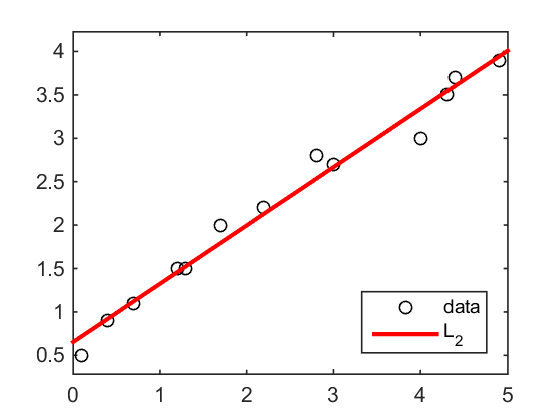

theta =

    0.6713
    0.6531

In [30]:
% data points in column vector [input, output]
x = [0.1 0.4 0.7 1.2 1.3 1.7 2.2 2.8 3.0 4.0 4.3 4.4 4.9]';
y = [0.5 0.9 1.1 1.5 1.5 2.0 2.2 2.8 2.7 3.0 3.5 3.7 3.9]';

m = length(y);
A = [x ones(m,1)];

theta = inv(A'*A)*A'*y

%% to plot
plot(x,y,'ko'), hold on

% to plot a straight line (fitted line)
xp = 0:0.01:5;
yp = theta(1)*xp + theta(2);

plot(xp,yp,'r','linewidth',2);  hold off
axis equal
legend('data','L_2','location','se');

### 2) use CVX optimization (least squared)

$$  \min_{\theta} ~ \lVert \hat y - y \rVert_2  =  \min_{\theta} ~ \lVert A\theta - y \rVert_2  $$

In [31]:
clear theta

cvx_begin quiet
    variable theta(2,1)
    minimize norm(A*theta - y,2)
cvx_end

theta

theta =

    0.6713
    0.6531

### BTW, do we have to use only $L_2$ norm? No.
- Let's use $L_1$ norm

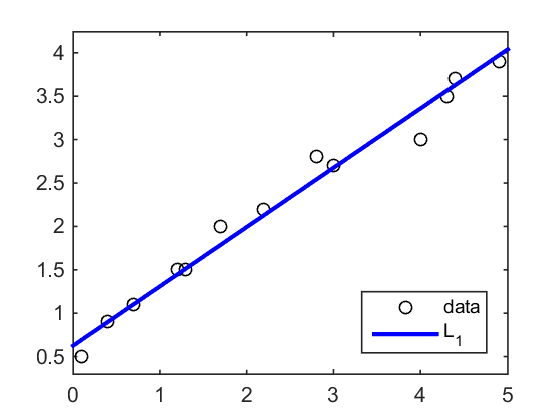

theta =

    0.6826
    0.6270

In [32]:
clear theta

cvx_begin quiet
    variable theta(2,1)
    minimize norm(A*theta - y,1)
cvx_end

theta

%% to plot
plot(x,y,'ko'), hold on

% to plot a straight line (fitted line)
xp = 0:0.01:5;
yp = theta(1)*xp + theta(2);

plot(xp,yp,'b','linewidth',2);  hold off
axis equal
legend('data','L_1','location','se');

$L_1$ norm also provides a decent linear approximation. __What if outliers exist?__

- fitting with the different norms
- Discuss the result
- it is important to understand what makes them different.


- source:
    - Week 9 of Computational Methods for Data Analysis by Coursera of Univ. of Washingon
    - Chapter 17, online book [available](http://courses.washington.edu/amath582/582.pdf)

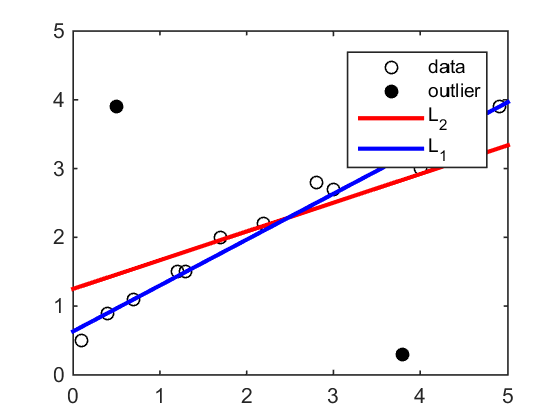

In [33]:
x = [0.1 0.4 0.7 1.2 1.3 1.7 2.2 2.8 3.0 4.0 4.3 4.4 4.9]';
y = [0.5 0.9 1.1 1.5 1.5 2.0 2.2 2.8 2.7 3.0 3.5 3.7 3.9]';

% add outliers
x = [x; 0.5; 3.8];
y = [y; 3.9; 0.3];

A = [x ones(length(x),1)];

cvx_begin quiet
    variable theta2(2,1)
    minimize norm(A*theta2 - y,2)
cvx_end

cvx_begin quiet
    variable theta1(2,1)
    minimize norm(A*theta1 - y,1)
cvx_end

xp = 0:0.01:5;
plot(x,y,'ko'), box on, hold on 
plot(x(end-1:end),y(end-1:end),'ko','markerfacecolor','k')
plot(xp,theta2(1)*xp + theta2(2),'r','linewidth',2)
plot(xp,theta1(1)*xp + theta1(2),'b','linewidth',2), hold off
ylim([0 5])
legend('data','outlier','L_2','L_1','location','ne');

## 1.3. Multivariate Linear Regression (linear regression for multivariate data)

<br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr>
        <td width = 400 style="border-style: hidden; border-collapse: collapse;">
            $$ \hat{y}_{i} = \theta_{1}x_1 + \theta_{2}x_2 + \theta_3$$

$$\phi(x_{i}) = \begin{bmatrix}x_{1i}\\x_{2i} \\1\end{bmatrix}$$
        </td>       
        <td width = 400>
            <img src="./image_files/multi_regression.png", width = 300>
        </td>
    </tr>
</table>

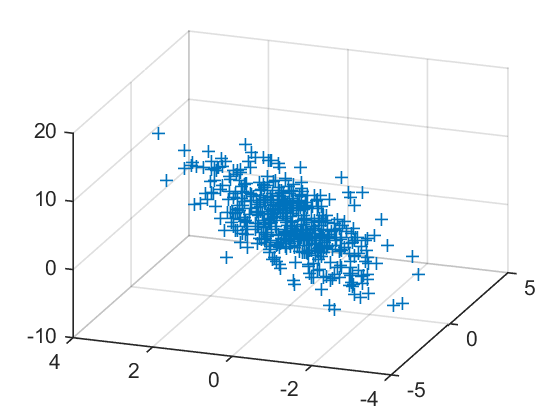

In [34]:
%% Data Generation

% y = theta(1)x1 + theta(2)x2 + theta(3) + noise

n = 500;

x1 = randn(n,1);
x2 = randn(n,1);

real_theta1 = 1;
real_theta2 = 3;
real_theta3 = 2;

e = 0.5*randn(n,1);
y = real_theta1*x1 + real_theta2*x2 + real_theta3 + e;

figure(1),  clf
plot3(x1,x2,y,'+'), view(-70,28)
grid on

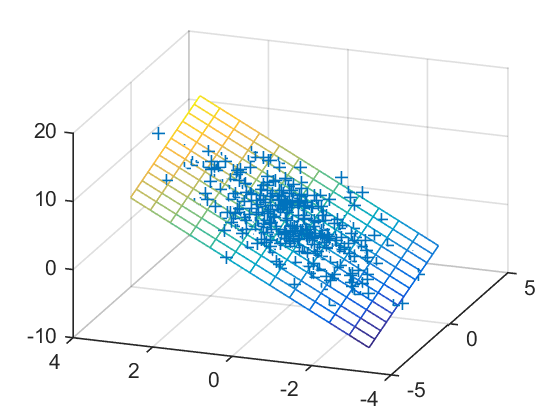

theta =

    0.9943
    2.9851
    2.0016

In [35]:
%% Regression

A = [x1, x2, ones(n,1)];
theta = inv(A'*A)*A'*y

[X1 X2] = meshgrid(min(x1):0.5:max(x1), min(x2):0.5:max(x2));
yhat = theta(1)*X1 + theta(2)*X2 + theta(3);

figure(2),  clf
plot3(x1,x2,y,'+'),     hold on
mesh(X1,X2,yhat)
grid on,    view(-70,28)
hold off

# 2. Nonlinear Regression (Linear Regression for non-linear data set)

<br>
<img src = "./image_files/nonlinear2.png", width = 300>

- same as linear regression, just with non-linear features
- method 1: constructing explicit feature vectors
    - polynomial features
    - Radial basis function (<font color='red'>RBF</font>) features
- method 2: implicit feature vectors, <font color='red'>kernels</font> (_optional_)


- polynomial (here, quad is used as an example)

$$
\begin{align*}
y &= \theta_1x^2 + \theta_2x + \theta_3 + \text{noise}
\end{align*}
$$

$$\phi(x_{i}) = \begin{bmatrix}x_{i}^2\\x_{i} \\1\end{bmatrix}$$

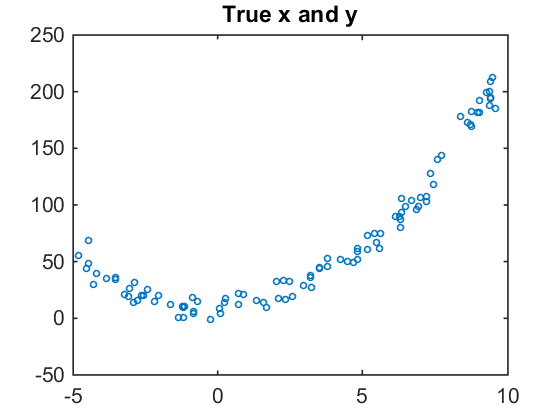

In [20]:
% y = theta(1)x + theta(2)x^2 + theta(3) + noise

n = 100;            % # of Data points
x = -5 + 15*rand(n,1);

real_theta1 = 2;
real_theta2 = 1;
real_theta3 = 10;

noise = 8*randn(n,1);

y = real_theta1*x.^2 + real_theta2*x + real_theta3 + noise;

plot(x,y,'o','markersize',3)
%axis equal
title('True x and y')

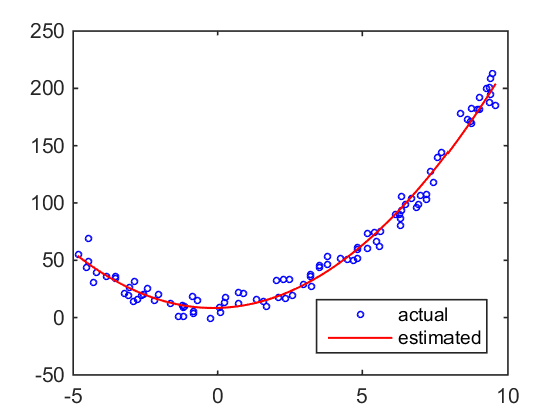

theta =

    2.0673
    0.6270
    8.4177

In [22]:
A = [x.^2, x, ones(n,1)];
theta = inv(A'*A)*A'*y

xpt = linspace(min(x),max(x));
ypt = theta(1)*xpt.^2 + theta(2)*xpt + theta(3);

figure(2),  clf
plot(x,y,'bo','markersize',3), hold on
plot(xpt,ypt,'r','linewidth',1)
%axis equal
hold off
legend('actual','estimated','location','SE')

## Example: overfitting

This is a very important m-file that you might want to fully understand or even memorize

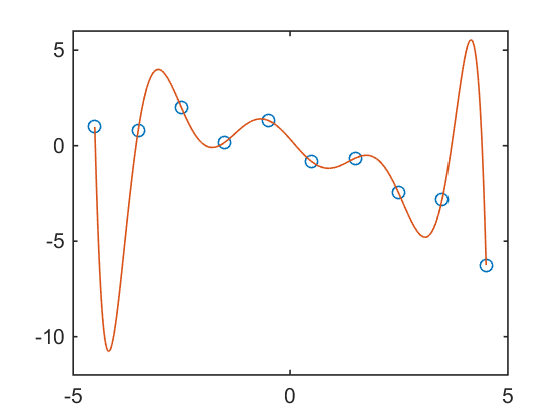

In [24]:
x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

xpt = -4.5:0.01:4.5; 
xpt = xpt(:);

Phi = [];
polybasis = [];
for i = 0:9
    Phi = [Phi x.^i];
    polybasis = [polybasis xpt.^i];
end

theta = inv(Phi'*Phi)*Phi'*y;
ypt = polybasis*theta;

plot(x,y,'o'),  hold on
plot(xpt,ypt), hold off
axis([-5 5 -12 6])

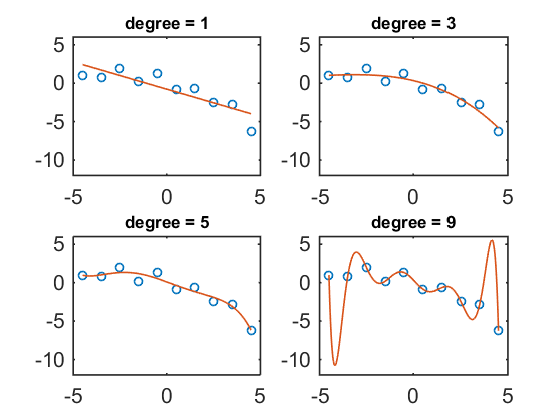

In [8]:
x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

xpt = -4.5:0.01:4.5; 
xpt = xpt(:);

d = [1 3 5 9];
RSS = [];
for k = 1:4    
    Phi = [];
    polybasis = [];
    for i = 0:d(k)
        Phi = [Phi x.^i];
        polybasis = [polybasis xpt.^i];        
    end

    theta = inv(Phi'*Phi)*Phi'*y;
    ypt = polybasis*theta;
    
    RSS = [RSS norm(y-Phi*theta,2)];

    subplot(2,2,k),  
    plot(x,y,'o','markersize',4),  hold on
    plot(xpt,ypt), hold off
    axis([-5 5 -12 6])
    title(['degree = ',num2str(d(k))],'fontsize',8)
end

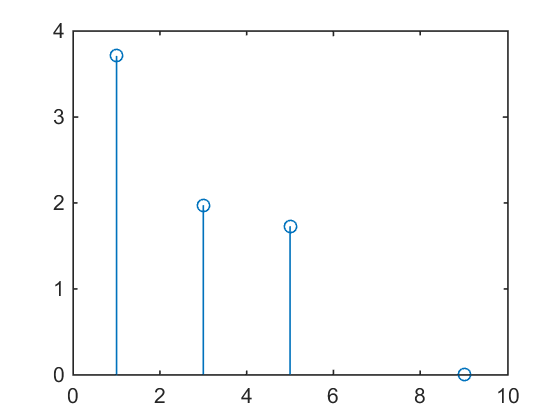

In [22]:
stem(d,RSS)

# 3. Linear Basis Function Models

- Construct explicit feature vectors

- Consider linear combinations of fixed nonlinear functions of the input variables, of the form

$$ \hat{y}=\sum_{i=0}^d{\theta_i \phi_i(x)} = \Phi \theta$$

1) Polynomial functions

$$\phi_i(x) = x^i, \quad i = 0,\cdots,d$$

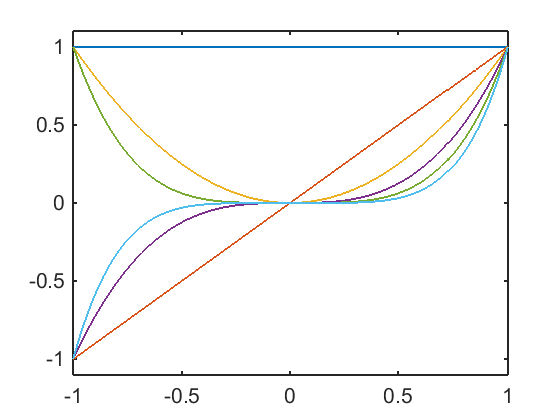

In [1]:
xpt = -1:0.01:1; 
xpt = xpt(:);

polybasis = [];
for i = 0:5
    polybasis = [polybasis xpt.^i];        
end

plot(xpt,polybasis), ylim([-1.1 1.1])

2) RBF functions with bandwidth $\sigma$ and $k$ RBF centers $\mu_i \in \mathbb{R}^n$

$$ \phi_i(x) =  \exp \left( - \frac{\lVert x-\mu_i \rVert^2}{2\sigma^2}\right) $$

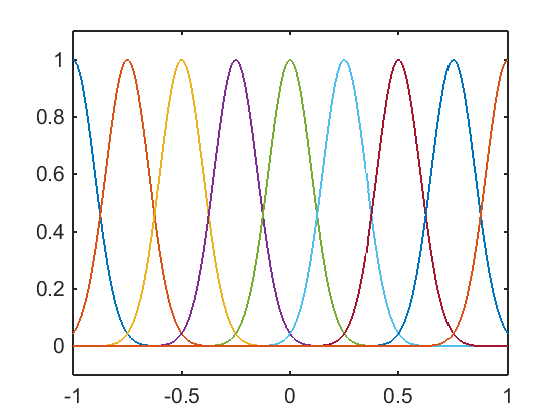

In [3]:
d = 9;

u = linspace(-1,1,d);

sigma = 0.1;

rbfbasis = [];
for i = 1:d
    rbfbasis = [rbfbasis exp(-(xpt-u(i)).^2/(2*sigma^2))];
end
plot(xpt,rbfbasis), ylim([-0.1 1.1])

- With many features, our prediction function becomes very expenssive

- Can lead to overfitting (low error on input data points, but high error nearby)

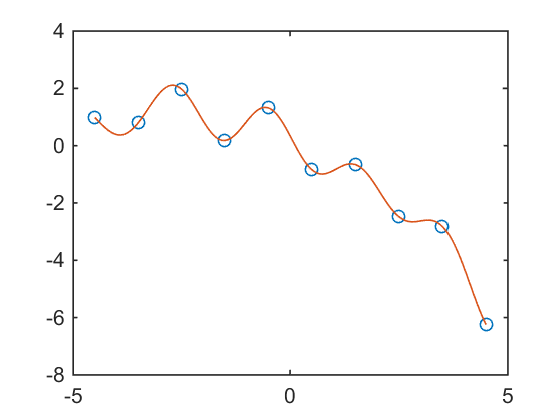

In [13]:
x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

xpt = -4.5:0.01:4.5; 
xpt = xpt(:);

d = 10;
u = linspace(-4.5,4.5,d);

sigma = 1;

Phi = [];
rbfbasis = [];
for i = 1:d
    Phi = [Phi exp(-(x-u(i)).^2/(2*sigma^2))];
    rbfbasis = [rbfbasis exp(-(xpt-u(i)).^2/(2*sigma^2))];    
end
theta = inv(Phi'*Phi)*Phi'*y;

ypt = rbfbasis*theta;
plot(x,y,'o',xpt,ypt)

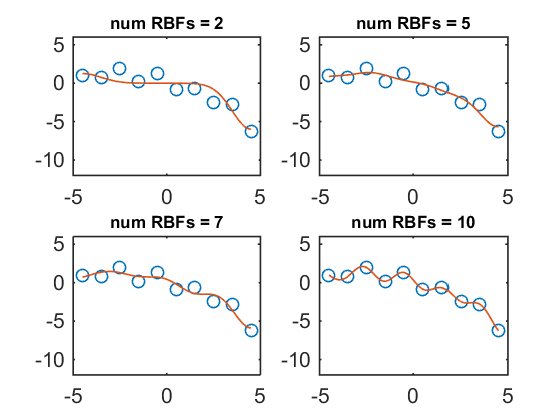

In [15]:
x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

xpt = -4.5:0.01:4.5; 
xpt = xpt(:);

sigma = 1;
d = [2 5 7 10];

for k = 1:4
    u = linspace(-4.5,4.5,d(k));
    
    Phi = [];
    rbfbasis = [];
    for i = 1:d(k)
        Phi = [Phi exp(-(x-u(i)).^2/(2*sigma^2))];
        rbfbasis = [rbfbasis exp(-(xpt-u(i)).^2/(2*sigma^2))];    
    end
    theta = inv(Phi'*Phi)*Phi'*y;

    ypt = rbfbasis*theta;
    
    subplot(2,2,k), plot(x,y,'o',xpt,ypt), axis([-5 5 -12 6])
    title(['num RBFs = ',num2str(d(k))],'fontsize',8)
end


# 4. Regularization (Shrinkage methods)

Often, overfitting associated with very large estimated parameters $\theta$

We want to balance

- how well function fits data

- magnitude of coefficients
<br><br>
$$
\begin{align*}
\text{Total cost} = \;&\underbrace{\text{measure of fit}}_{RSS(\theta)}  + \;\lambda \cdot \underbrace{\text{measure of magnitude of coefficients}}_{\lambda \cdot \lVert \theta \rVert_2^2} \\ \\
\implies &\min\; \lVert \Phi \theta - y \rVert_2^2 + \lambda \lVert \theta \rVert_2^2
\end{align*}
$$
<br>
  where $ RSS(\theta) = \lVert \Phi\theta - y \rVert^2_2 $, ( = Rresidual Sum of Squares) and $\lambda$ is a tuning parameter to be determined separately

<br>
- the second term, $\lambda \cdot \lVert \theta \rVert_2^2$, called a shrinkage penalty, is small when $\theta_1, \cdots,\theta_d$ are close to zeros, and so it has the effect of shrinking the estimates of $\theta_j$ towards zero


- The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates


- known as a _ridge regression_

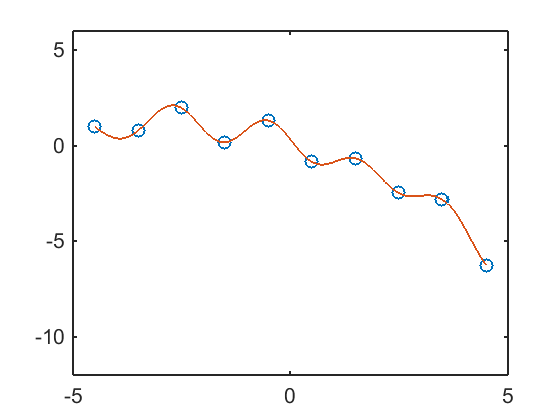

ans =

    3.9841   -7.5034   12.5602  -14.0568   15.6081  -14.8998   13.3095  -13.4523   10.2514  -10.7913

In [2]:
% cvx code

x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

xpt = -4.5:0.01:4.5; 
xpt = xpt(:);

d = 10;
u = linspace(-4.5,4.5,d);

sigma = 1;

Phi = [];
rbfbasis = [];
for i = 1:d
    Phi = [Phi exp(-(x-u(i)).^2/(2*sigma^2))];
    rbfbasis = [rbfbasis exp(-(xpt-u(i)).^2/(2*sigma^2))];    
end

% theta = inv(Phi'*Phi)*Phi'*y;

clear theta
lambda = 0.1;
cvx_begin quiet
    variable theta(d);
    minimize norm(Phi*theta-y,2)     
cvx_end

ypt = rbfbasis*theta;
plot(x,y,'o',xpt,ypt)
axis([-5 5 -12 6])
theta'

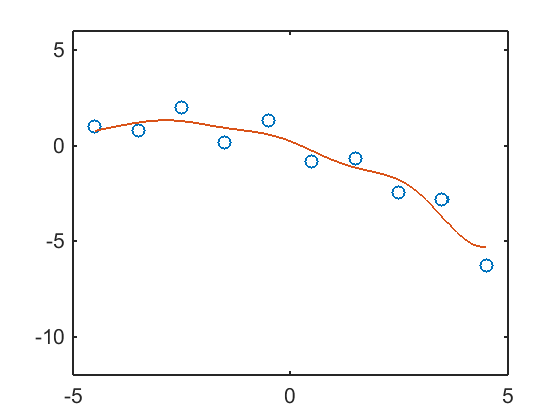

ans =

    0.4240    0.3524    1.0129   -0.1570    0.7491   -0.1610   -0.7943   -0.4148   -0.3175   -5.0249

In [5]:
% ridge regression 

x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

xpt = -4.5:0.01:4.5; 
xpt = xpt(:);

d = 10;
u = linspace(-4.5,4.5,d);

sigma = 1;

Phi = [];
rbfbasis = [];
for i = 1:d
    Phi = [Phi exp(-(x-u(i)).^2/(2*sigma^2))];
    rbfbasis = [rbfbasis exp(-(xpt-u(i)).^2/(2*sigma^2))];    
end

% theta = inv(Phi'*Phi)*Phi'*y;

clear theta
lambda = 0.1;
cvx_begin quiet
    variable theta(d);
    % minimize norm(Phi*theta-y,2) 
    minimize sum_square(Phi*theta-y) + lambda*sum_square(theta)
cvx_end

ypt = rbfbasis*theta;
plot(x,y,'o',xpt,ypt)
axis([-5 5 -12 6])
theta'

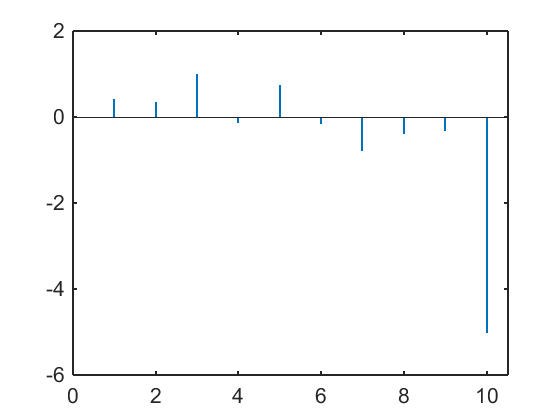

In [7]:
% Regulization ( = ridge nonlinear regression) encourages small weights, but not exactly 0

stem(theta,'marker','none'), xlim([0,10.5])

# 5. Sparsity for feature selection using Lasso

- Least Squares with a penalty on the $L_1$-norm of the parameters
- start with full model (all possible features)
- "Shrink" some coefficients exactly to 0
    - _i.e._, knock out certain features
    - the $\mathscr{l}_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero
- Non-zero coefficients indicate "selected" features

Try this cost instead of ridge...
<br><br>
$$
\begin{align*}
\text{Total cost} = \;&\underbrace{\text{measure of fit}}_{RSS(\theta)}  + \;\lambda \cdot \underbrace{\text{measure of magnitude of coefficients}}_{\lambda \cdot \lVert \theta \rVert_1} \\ \\
\implies &\min\; \lVert \Phi \theta - y \rVert_2^2 + \lambda \lVert \theta \rVert_1
\end{align*}$$
<br>

- $\lambda$ is a tuning parameter = balance of fit and sparsity

<br>
- Another equivalent forms of optimizations


$$
\begin{array}{Icr}\begin{align*}
\min_{\theta} \quad
& \lVert \Phi \theta - y \rVert_2^2 \\
\text{subject to} \quad
& \lVert \theta \rVert_1 \leq s
\end{align*}\end{array}
\quad\quad\quad\quad
\begin{array}{I}
\min_{\theta} \quad
& \lVert \Phi \theta - y \rVert_2^2 \\
\text{subject to} \quad
& \lVert \theta \rVert_2^2 \leq s
\end{array}
$$


<br>
<img src="./image_files/lasso_picture.png", width=500>

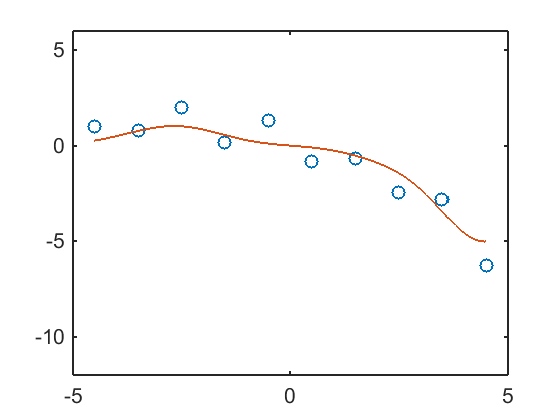

ans =

    0.0000    0.2528    0.8602    0.0000    0.0000   -0.0000   -0.0000   -0.7645   -0.0000   -4.9090

In [8]:
% Lasso regression

x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

xpt = -4.5:0.01:4.5; 
xpt = xpt(:);

d = 10;
u = linspace(-4.5,4.5,d);

sigma = 1;

Phi = [];
rbfbasis = [];
for i = 1:d
    Phi = [Phi exp(-(x-u(i)).^2/(2*sigma^2))];
    rbfbasis = [rbfbasis exp(-(xpt-u(i)).^2/(2*sigma^2))];    
end

% theta = inv(Phi'*Phi)*Phi'*y;

clear theta
lambda = 2;
cvx_begin quiet
    variable theta(d);
    % minimize norm(Phi*theta-y,2) 
    % minimize sum_square(Phi*theta-y) + lambda*sum_square(theta)
    minimize sum_square(Phi*theta-y) + lambda*norm(theta,1)  
cvx_end

ypt = rbfbasis*theta;
plot(x,y,'o',xpt,ypt)
axis([-5 5 -12 6])
theta'

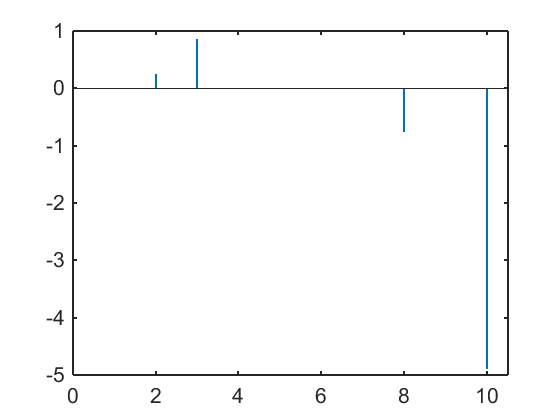

In [9]:
% sparse: only 4 parameters are non-zero

stem(theta,'marker','none'), xlim([0 10.5])

# 6. Implicit Feature Vectors: Kernels (Optional)

- One of the main trends in machine learning in the past 15 years
- Kernels let us work in high-dimensional feature spaces without explicitly constructing the feature vector
- This method will resolve the computational difficulty of constructing feature vectors

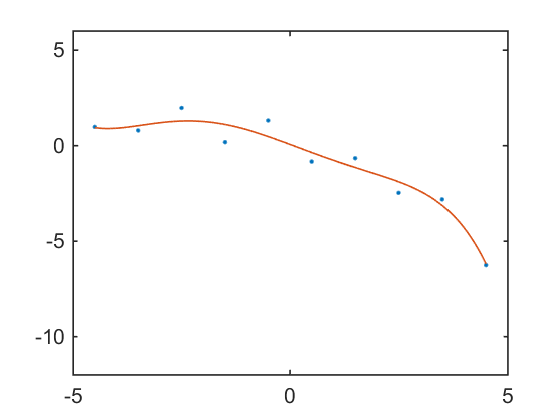

In [6]:
%% polynomial

x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

m = length(x);
X = x;

d = 5;

% K = [];
% for i = 1:m
%     for j = 1:m
%        K(i,j) = (1 + X(i,:)*X(j,:)')^d; 
%     end
% end

% or 
K = (1 + X*X').^d;

lambda = 1;
alpha = (K + lambda*eye(m)) \ y;

%
x_test = -4.5:0.01:4.5;
x_test = x_test(:);

k_test = (1 + x_test*X').^d;
y_hat = k_test*alpha;

plot(x,y,'.'),  hold on
plot(x_test',y_hat),    hold off
axis([-5 5 -12 6])

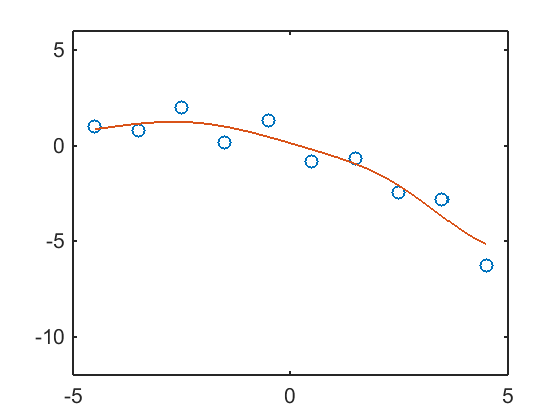

In [10]:
%% RBF kernel

x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';

m = length(x);
X = x;

d = 10;

% RBF kernel
sigma = 2;
lambda = 0.1;

K = exp(-0.5*sqdist(X',X')/sigma^2);
alpha = (K + lambda*eye(m)) \ y;

%
x_test = -4.5:0.01:4.5;
x_test = x_test(:);

k_test = exp(-0.5*sqdist(x_test',X')/(sigma^2));

y_hat = k_test*alpha;

plot(x,y,'o'),  hold on
plot(x_test',y_hat),    hold off
axis([-5 5 -12 6])

```octave
function m = sqdist(p, q)

% SQDIST        Squared Euclidean or Mahalanobis distance.
% SQDIST(p,q)   returns m(i,j) = (p(:,i) - q(:,j))'*(p(:,i) - q(:,j)).

pn = size(p,2);
qn = size(q,2);

m = zeros(pn,qn);

for i = 1:pn
    for j = 1:qn
        m(i,j) = (p(:,i) - q(:,j))'*(p(:,i) - q(:,j));
    end
end
```


In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>